In [1]:
import os
from nscl.datasets.clevr_dataset import CLEVRDataset, build_clevr_dataset, build_clevr_dataloader
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
img_root = os.path.abspath(os.getcwd()) + '/data/images'
scene_json = os.path.abspath(os.getcwd()) + '/data/scenes.json'
questions_json = os.path.abspath(os.getcwd()) + '/data/questions.json'

dataset = build_clevr_dataset(img_root, scene_json, questions_json)

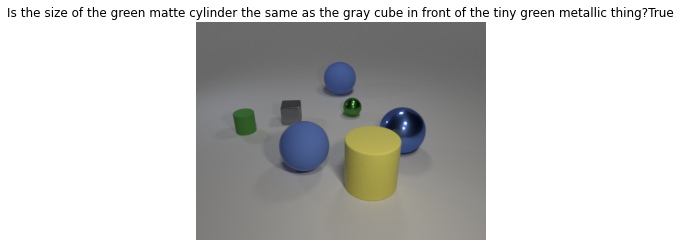

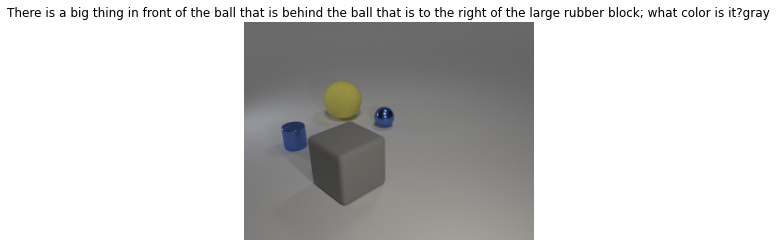

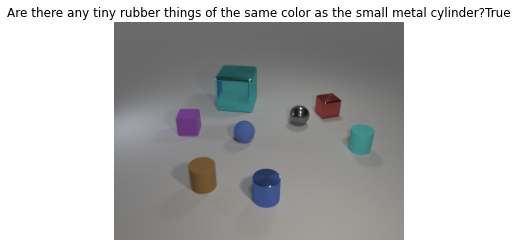

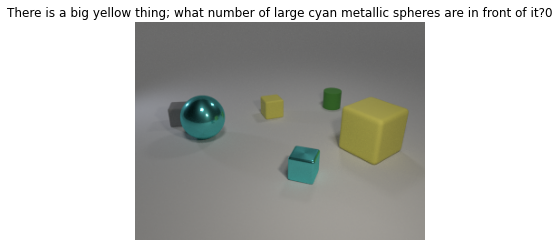

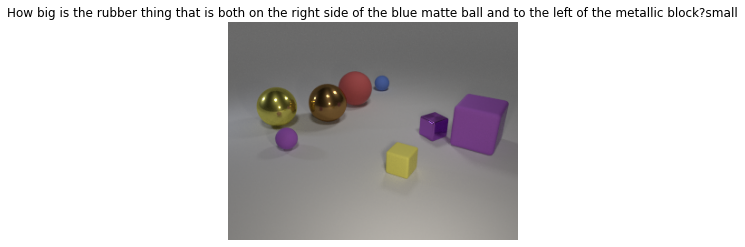

In [3]:
dataloader = build_clevr_dataloader(dataset, batch_size=5, shuffle=True, drop_last=True)
for imgs, questions, scenes in dataloader:
    for img, question in zip(imgs, questions):
        plt.figure()
        plt.axis("off")
        plt.title(f'{question.raw_question}{question.answer}')
        plt.imshow(img.permute(1, 2, 0))
    break

In [4]:
# Program translator
dataloader = build_clevr_dataloader(dataset, batch_size=10, shuffle=True, drop_last=True)
for imgs, questions, scenes in dataloader:
    for img, question in zip(imgs, questions):
        print(question.raw_question)
        for p in question.program:
            print(f'{p.operator},{p.attribute},{p.concept}', end='|')
        print()
    break

What number of things are tiny shiny spheres in front of the tiny green shiny cube or big things that are to the left of the small cyan ball?
scene,,|filter,size,small|filter,color,green|filter,material,metal|filter,shape,cube|unique,,|relate,,front|filter,size,small|filter,material,metal|filter,shape,sphere|scene,,|filter,size,small|filter,color,cyan|filter,shape,sphere|unique,,|relate,,left|filter,size,large|union,,|count,,|
How many objects are objects in front of the tiny blue metallic cylinder or red shiny objects?
scene,,|filter,size,small|filter,color,blue|filter,material,metal|filter,shape,cylinder|unique,,|relate,,front|scene,,|filter,color,red|filter,material,metal|union,,|count,,|
What is the material of the tiny blue cube that is right of the shiny block in front of the tiny metal cube behind the small gray cylinder?
scene,,|filter,size,small|filter,color,gray|filter,shape,cylinder|unique,,|relate,,behind|filter,size,small|filter,material,metal|filter,shape,cube|unique,,|re